# Customer Churn 

A bank, Beta-Bank, has been losing clients every month—slowly but noticeably. Marketing specialists have calculated that retaining existing clients is cheaper than acquiring new ones.
Your task is to predict whether a client will leave the bank in the near future based on historical data on customer behavior and contract terminations.
You need to build a model with the highest possible F1-score. To pass the project, the metric should be at least 0.59. Evaluate the F1-score on the test set.
Additionally, calculate AUC-ROC and compare its value to the F1-score.

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Features

RowNumber — row index in the dataset

CustomerId — unique customer identifier

Surname — last name

CreditScore — credit score

Geography — country of residence

Gender — gender

Age — age of the customer

Tenure — number of years the customer has been with the bank

Balance — account balance

NumOfProducts — number of bank products used by the customer

HasCrCard — whether the customer has a credit card

IsActiveMember — whether the customer is an active member

EstimatedSalary — estimated salary


### Target variable

Exited — whether the customer left the bank (1 = left, 0 = stayed)

# Step 1. Data Preparation

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/Churn.csv')
pd.set_option('max_r', 30)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [155]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


# Step 2. Exploratory Analysis

In [157]:
# Function to count missing values:
def missing_values_table(df):
        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Tenure,909,9.1


In [158]:
tenure_bysurname = df.pivot_table(index='Geography', values='CustomerId', columns='Tenure', aggfunc='count')
tenure_bysurname

Tenure,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Geography,,,,,,,,,,,
France,187,480,469,461,458,441,454,500,422,450,228
Germany,98,247,252,239,209,240,208,203,240,241,116
Spain,97,225,229,228,218,246,219,222,271,191,102


In [159]:
tenure_bysurname1 = df.pivot_table(index='Geography', values='CustomerId', aggfunc='count')
tenure_bysurname1

,CustomerId
Geography,
France,5014
Germany,2509
Spain,2477


In [160]:
df['Surname'].value_counts()

Smith         32
Martin        29
Scott         29
Walker        28
Brown         26
              ..
Rita           1
Creel          1
Rounsevell     1
McClinton      1
Wilkie         1
Name: Surname, Length: 2932, dtype: int64

In [161]:
df = df.drop('Tenure', axis=1)

In [162]:
df = df.drop('Surname', axis=1)

In [163]:
df = df.drop('CustomerId', axis=1)

In [164]:
# Checked for class imbalance, and it turned out to be significant.

In [165]:
class_frequency = df['Exited'].value_counts(normalize=True)
class_frequency

0    0.7963
1    0.2037
Name: Exited, dtype: float64

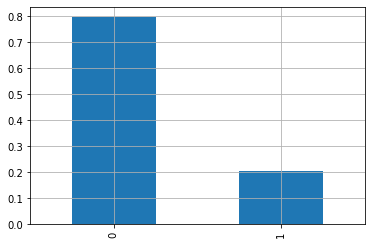

In [166]:
class_frequency.plot(kind='bar', grid=True);

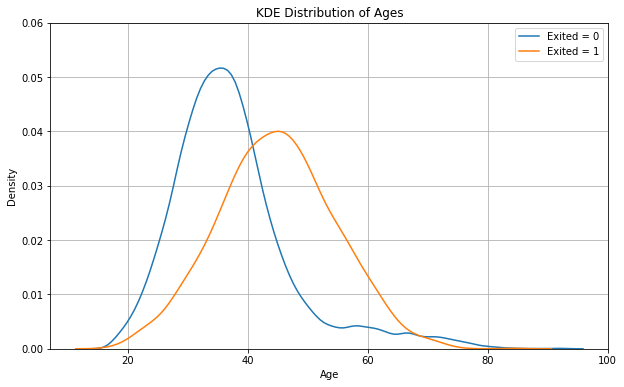

In [167]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.kdeplot(df.loc[df['Exited'] == 0, 'Age'], label = 'Exited = 0')
sns.kdeplot(df.loc[df['Exited'] == 1, 'Age'], label = 'Exited = 1')
plt.xlabel('Age')
plt.ylim(0, 0.06)
plt.ylabel('Density')
plt.title('KDE Distribution of Ages')
plt.grid(True)
plt.show()

In [168]:
# Encoding categorical features.

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [170]:
df

,RowNumber,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,France,Male,39,0.00,2,1,0,96270.64,0
9996,9997,516,France,Male,35,57369.61,1,1,1,101699.77,0
9997,9998,709,France,Female,36,0.00,1,0,1,42085.58,1
9998,9999,772,Germany,Male,42,75075.31,2,1,0,92888.52,1


In [171]:
data_ohe = pd.get_dummies(df, drop_first=True)
y = data_ohe['Exited']
X = data_ohe.drop('Exited', axis=1)

In [172]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [173]:
X

,RowNumber,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,0.00,1,1,1,101348.88,0,0,0
1,2,608,41,83807.86,1,0,1,112542.58,0,1,0
2,3,502,42,159660.80,3,1,0,113931.57,0,0,0
3,4,699,39,0.00,2,0,0,93826.63,0,0,0
4,5,850,43,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,0.00,2,1,0,96270.64,0,0,1
9996,9997,516,35,57369.61,1,1,1,101699.77,0,0,1
9997,9998,709,36,0.00,1,0,1,42085.58,0,0,0
9998,9999,772,42,75075.31,2,1,0,92888.52,1,0,1


In [174]:
# Split the dataset into training, validation, and test sets.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=12345)

In [175]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape

((6000, 11), (6000,), (2000, 11), (2000,), (2000, 11), (2000,))

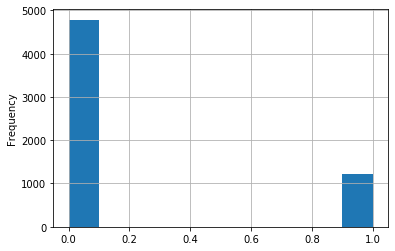

In [176]:
y_train.plot(kind='hist',grid=True);

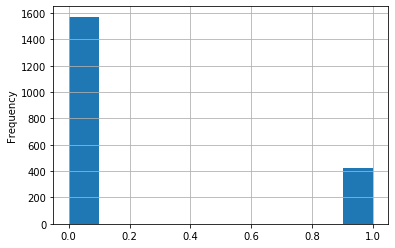

In [177]:
y_valid.plot(kind='hist',grid=True);

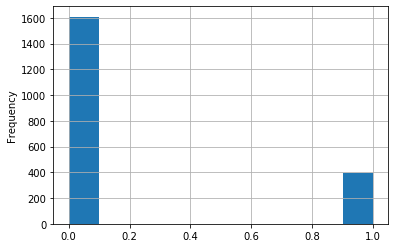

In [178]:
y_test.plot(kind='hist',grid=True);

In [179]:
X_train

,RowNumber,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,493,639,38,81550.94,2,0,1,118974.77,0,0,0
6655,6656,554,44,85304.27,1,1,1,58076.52,0,0,1
4287,4288,714,53,99141.86,1,1,1,72496.05,1,0,1
42,43,556,61,117419.35,1,1,1,94153.83,0,0,0
8178,8179,707,46,127476.73,2,1,1,146011.55,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8819,8820,592,36,123187.51,1,0,1,146111.35,1,0,1
1537,1538,821,28,0.00,1,1,1,36754.13,0,0,0
1408,1409,707,32,0.00,2,0,0,30807.02,0,0,1
7661,7662,612,44,115163.38,1,1,1,97677.52,1,0,1


In [180]:
# Scaling of numerical features.

In [181]:
numeric = ['CreditScore', 'Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

In [182]:
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

In [183]:
X_train.shape, X_test.shape, X_valid.shape

((6000, 11), (2000, 11), (2000, 11))

In [184]:
X_train

,RowNumber,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,493,-0.134048,-0.078068,0.076163,0.816929,-1.550255,0.968496,0.331571,0,0,0
6655,6656,-1.010798,0.494555,0.136391,-0.896909,0.645055,0.968496,-0.727858,0,0,1
4287,4288,0.639554,1.353490,0.358435,-0.896909,0.645055,0.968496,-0.477006,1,0,1
42,43,-0.990168,2.116987,0.651725,-0.896909,0.645055,0.968496,-0.100232,0,0,0
8178,8179,0.567351,0.685430,0.813110,0.816929,0.645055,0.968496,0.801922,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8819,8820,-0.618839,-0.268942,0.744283,-0.896909,-1.550255,0.968496,0.803658,1,0,1
1537,1538,1.743227,-1.032439,-1.232442,-0.896909,0.645055,0.968496,-1.098797,0,0,0
1408,1409,0.567351,-0.650691,-1.232442,0.816929,-1.550255,-1.032529,-1.202257,0,0,1
7661,7662,-0.412545,0.494555,0.615524,-0.896909,0.645055,0.968496,-0.038931,1,0,1


##### Training models without considering class imbalance.

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

###### 1. DecisionTreeClassifier

In [186]:
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    print("max_depth =", depth,)
    print("F1:",f1_score(y_valid, predicted_valid))
    print()

max_depth = 1
F1: 0.0

max_depth = 2
F1: 0.5272969374167776

max_depth = 3
F1: 0.4113475177304965

max_depth = 4
F1: 0.4278260869565217

max_depth = 5
F1: 0.5617021276595745

max_depth = 6
F1: 0.5119236883942766

max_depth = 7
F1: 0.5587392550143266

max_depth = 8
F1: 0.5231213872832371

max_depth = 9
F1: 0.5348189415041783

max_depth = 10
F1: 0.5217391304347826



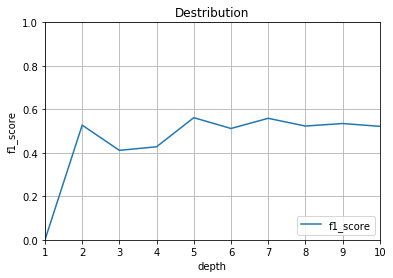

In [187]:
depth_lst = []
f_1_lst = []

for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    f_1 = f1_score(y_valid, predicted_valid)
    depth_lst.append(depth)
    f_1_lst.append(f_1)
    
    
plt.plot(depth_lst, f_1_lst, label='f1_score'% f_1)
plt.xlim([1, 10])
plt.ylim([0, 1])
plt.xlabel('depth')
plt.ylabel('f1_score')
plt.title('Destribution')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [188]:
model_dtc = DecisionTreeClassifier(random_state=12345,max_depth=5)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [189]:
predicted_valid = model_dtc.predict(X_valid)

In [190]:
print("F1:",f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.5617021276595745
Auc_ROC: 0.7064210007578116


In [191]:
confusion_matrix(y_valid,predicted_valid)

array([[1493,   80],
       [ 229,  198]])

In [192]:
predicted_train = model_dtc.predict(X_train)

In [193]:
print("F1:",f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.5887530562347189
Auc_ROC: 0.7234976464639307


###### 2. LogisticRegression

In [194]:
model_lr = LogisticRegression(random_state=12345)

In [195]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
predicted_valid = model_lr.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.2986111111111111
Auc_ROC: 0.580677146996074


In [197]:
predicted_train = model_lr.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.33234421364985167
Auc_ROC: 0.595396238769164


In [198]:
model_lr_1 = LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear')

In [199]:
model_lr_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

In [200]:
predicted_valid = model_lr_1.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.5029337803855826
Auc_ROC: 0.7031634535360317


In [201]:
confusion_matrix(y_valid,predicted_valid)

array([[1107,  466],
       [ 127,  300]])

In [202]:
predicted_train = model_lr_1.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.4912993039443155
Auc_ROC: 0.7028854817203523


###### 3. RandomForestClassifier

In [203]:
for estimator in range(1,30,5):
    model = RandomForestClassifier(n_estimators=estimator,random_state=12345)
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    print("n_estimators =", estimator, ": ", end='')
    print("F1 =",f1_score(y_valid, predicted_valid))
    print()

n_estimators = 1 : F1 = 0.43623361144219314

n_estimators = 6 : F1 = 0.5038167938931298

n_estimators = 11 : F1 = 0.5649717514124294

n_estimators = 16 : F1 = 0.5446559297218155

n_estimators = 21 : F1 = 0.5544267053701016

n_estimators = 26 : F1 = 0.543026706231454



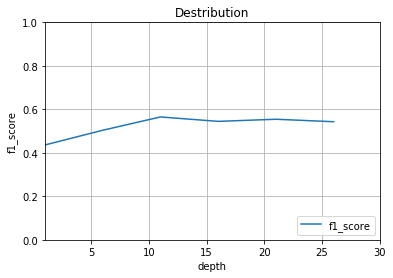

In [204]:
estimator_lst = []
f_1_lst = []

for estimator in range(1,30,5):
    model = RandomForestClassifier(n_estimators=estimator,random_state=12345)
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    f_1 = f1_score(y_valid, predicted_valid)
    estimator_lst.append(estimator)
    f_1_lst.append(f_1)
    
    
plt.plot(estimator_lst, f_1_lst, label='f1_score'% f_1)
plt.xlim([1, 30])
plt.ylim([0, 1])
plt.xlabel('depth')
plt.ylabel('f1_score')
plt.title('Destribution')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [205]:
model_rfc = RandomForestClassifier(n_estimators=11, random_state=12345)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [206]:
predicted_valid = model_rfc.predict(X_valid)

In [207]:
print("F1:", f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.5649717514124294
Auc_ROC: 0.7084450571782912


In [208]:
confusion_matrix(y_valid,predicted_valid)

array([[1492,   81],
       [ 227,  200]])

In [209]:
predicted_train = model_rfc.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.978758850478967
Auc_ROC: 0.9812203555947379


###### 4. GradientBoostingClassifier

In [210]:
for depth in range(1,11):
    model = GradientBoostingClassifier(random_state=12345,max_depth=depth)
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    print("max_depth =", depth, ": ", end='')
    print("F1 =",f1_score(y_valid, predicted_valid))
    print()

max_depth = 1 : F1 = 0.4364261168384879

max_depth = 2 : F1 = 0.5752212389380531

max_depth = 3 : F1 = 0.5818713450292399

max_depth = 4 : F1 = 0.5895953757225434

max_depth = 5 : F1 = 0.5735294117647058

max_depth = 6 : F1 = 0.5784172661870504

max_depth = 7 : F1 = 0.576271186440678

max_depth = 8 : F1 = 0.5481049562682216

max_depth = 9 : F1 = 0.5544267053701016

max_depth = 10 : F1 = 0.5643994211287989



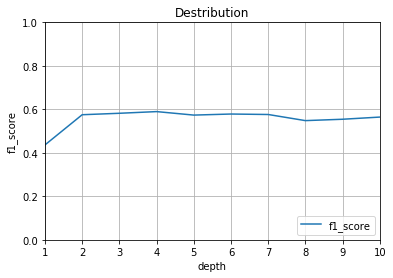

In [211]:
depth_lst = []
f_1_lst = []

for depth in range(1,11):
    model = GradientBoostingClassifier(random_state=12345,max_depth=depth)
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    f_1 = f1_score(y_valid, predicted_valid)
    depth_lst.append(depth)
    f_1_lst.append(f_1)
    
plt.plot(depth_lst, f_1_lst, label='f1_score'% f_1)
plt.xlim([1, 10])
plt.ylim([0, 1])
plt.xlabel('depth')
plt.ylabel('f1_score')
plt.title('Destribution')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()    

In [212]:
model_gb = GradientBoostingClassifier(max_depth=3, random_state=12345)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=12345, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [213]:
predicted_valid = model_gb.predict(X_valid)

In [214]:
print("F1:", f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.5818713450292399
Auc_ROC: 0.7145849679381722


In [215]:
confusion_matrix(y_valid,predicted_valid)

array([[1515,   58],
       [ 228,  199]])

In [216]:
predicted_train = model_gb.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.6346938775510205
Auc_ROC: 0.7426820582360552


In [217]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [218]:
models = []
models.append(RandomForestClassifier(n_estimators=13, random_state=12345))
models.append(GradientBoostingClassifier(max_depth =3,random_state=12345))
models.append(DecisionTreeClassifier(random_state=12345,max_depth=5))
models.append(LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear'))

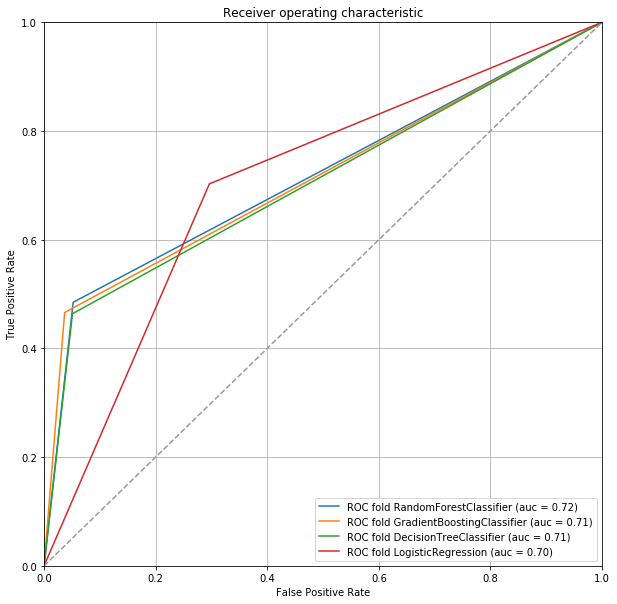

In [219]:
plt.figure(figsize=(10, 10)) 
for model in models:
    model.fit(X_train, y_train)
    pred_scr = model.predict(X_valid)
    fpr, tpr, thresholds = roc_curve(y_valid, pred_scr)
    roc_auc = roc_auc_score(y_valid, pred_scr)
    md = str(model)
    md = md[:md.find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

##### The highest accuracy and F1-score were achieved by the GradientBoostingClassifier model.

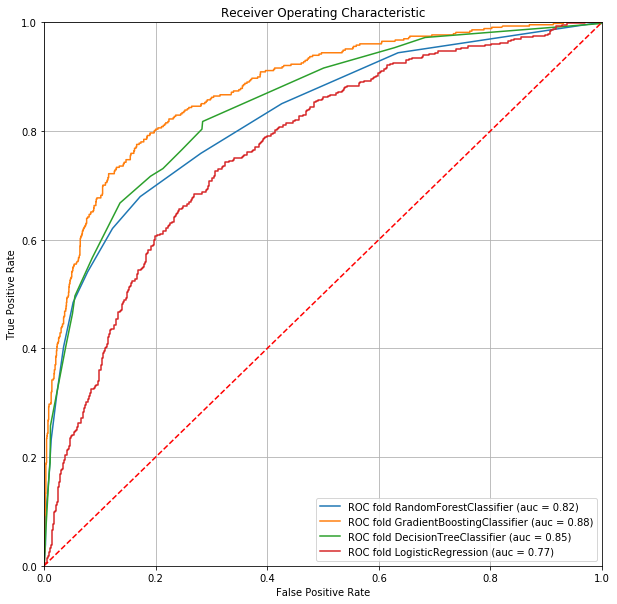

In [220]:
plt.figure(figsize=(10, 10)) 
for model in models:
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_valid)
    preds = probs[:,1]
    fpr, tpr, thresholds = roc_curve(y_valid, preds)
    roc_auc = roc_auc_score(y_valid, preds)
    md = str(model)
    md = md[:md.find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

##### Plotted the ROC curve, which takes the target values and the predicted probabilities for the positive class. The best-performing model was again the GradientBoostingClassifier.

# 3. Handling class imbalance

In [259]:
y_train.value_counts()

0    4781
1    1219
Name: Exited, dtype: int64

In [260]:
X_train.shape

(6000, 11)

In [261]:
X_zeros = X_train[y_train == 0]
X_ones = X_train[y_train == 1]
y_zeros = y_train[y_train == 0]
y_ones = y_train[y_train == 1]
print(X_zeros.shape)
print(X_ones.shape)
print(y_zeros.shape)
print(y_ones.shape)

(4781, 11)
(1219, 11)
(4781,)
(1219,)


In [264]:
repeat = 2
X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)

print(X_upsampled.shape)
print(y_upsampled.shape)

(7219, 11)
(7219,)


In [267]:
# Upsampling:
def upsample(X, y, repeat):
    X_zeros = X_train[y_train == 0]
    X_ones = X_train[y_train == 1]
    y_zeros = y_train[y_train == 0]
    y_ones = y_train[y_train == 1]
    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    return X_upsampled, y_upsampled

X_upsampled, y_upsampled = upsample(X_train, y_train, 3)
print(X_upsampled.shape)
print(y_upsampled.shape)

(8438, 11)
(8438,)


In [268]:
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(X_upsampled, y_upsampled)
    predicted_valid = model.predict(X_valid)
    print("max_depth =", depth, ": ", end='')
    print("F1 =",f1_score(y_valid, predicted_valid))
    print()

max_depth = 1 : F1 = 0.5110294117647058

max_depth = 2 : F1 = 0.5405887600356825

max_depth = 3 : F1 = 0.5443037974683544

max_depth = 4 : F1 = 0.5898366606170599

max_depth = 5 : F1 = 0.6269315673289183

max_depth = 6 : F1 = 0.5981500513874615

max_depth = 7 : F1 = 0.6064908722109533

max_depth = 8 : F1 = 0.6035634743875278

max_depth = 9 : F1 = 0.5867237687366167

max_depth = 10 : F1 = 0.5741324921135647



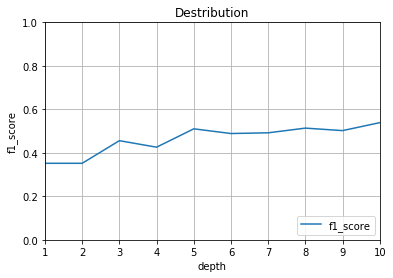

In [223]:
depth_lst = []
f_1_lst = []

for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(X_upsampled, y_upsampled)
    predicted_valid = model.predict(X_valid)
    f_1 = f1_score(y_valid, predicted_valid)
    depth_lst.append(depth)
    f_1_lst.append(f_1)
    
    
plt.plot(depth_lst, f_1_lst, label='f1_score'% f_1)
plt.xlim([1, 10])
plt.ylim([0, 1])
plt.xlabel('depth')
plt.ylabel('f1_score')
plt.title('Destribution')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [224]:
model_dtcUp = DecisionTreeClassifier(random_state=12345,max_depth=5)
model_dtcUp.fit(X_upsampled, y_upsampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [225]:
predicted_valid = model_dtcUp.predict(X_valid)

In [226]:
print("F1:",f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.5103734439834025
Auc_ROC: 0.7254727388855555


In [227]:
confusion_matrix(y_valid,predicted_valid)

array([[923, 650],
       [ 58, 369]])

In [228]:
predicted_train = model_dtcUp.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.5024723334118202
Auc_ROC: 0.7325711959031159


In [229]:
model_lr_up = LogisticRegression()

In [230]:
model_lr_up.fit(X_upsampled, y_upsampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [231]:
predicted_valid = model_lr_up.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.43066884176182707
Auc_ROC: 0.6407504566968054


In [232]:
confusion_matrix(y_valid,predicted_valid)

array([[ 557, 1016],
       [  31,  396]])

In [233]:
predicted_train = model_lr_up.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.40957642725598525
Auc_ROC: 0.6320161893220001


In [234]:
for estimator in range(1,50,5):
    model = RandomForestClassifier(n_estimators=estimator,random_state=12345)
    model.fit(X_upsampled, y_upsampled)
    predicted_valid = model.predict(X_valid)
    print("n_estimators =", estimator, ": ", end='')
    print("F1 =",f1_score(y_valid, predicted_valid))
    print()

n_estimators = 1 : F1 = 0.4694104560622915

n_estimators = 6 : F1 = 0.5359661495063469

n_estimators = 11 : F1 = 0.5732814526588846

n_estimators = 16 : F1 = 0.5837837837837837

n_estimators = 21 : F1 = 0.6046511627906977

n_estimators = 26 : F1 = 0.5997322623828648

n_estimators = 31 : F1 = 0.6082474226804123

n_estimators = 36 : F1 = 0.608695652173913

n_estimators = 41 : F1 = 0.5984455958549223

n_estimators = 46 : F1 = 0.6036269430051814



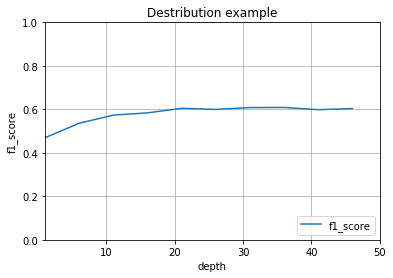

In [235]:
estimator_lst = []
f_1_lst = []

for estimator in range(1,50,5):
    model = RandomForestClassifier(n_estimators=estimator,random_state=12345)
    model.fit(X_upsampled, y_upsampled)
    predicted_valid = model.predict(X_valid)
    f_1 = f1_score(y_valid, predicted_valid)
    estimator_lst.append(estimator)
    f_1_lst.append(f_1)
    
    
plt.plot(estimator_lst, f_1_lst, label='f1_score'% f_1)
plt.xlim([1, 50])
plt.ylim([0, 1])
plt.xlabel('depth')
plt.ylabel('f1_score')
plt.title('Destribution example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [236]:
model_rfcUp = RandomForestClassifier(n_estimators=31,random_state=12345)

In [237]:
model_rfcUp.fit(X_upsampled, y_upsampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [238]:
predicted_valid = model_rfcUp.predict(X_valid)
print("F1:",f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.6082474226804123
Auc_ROC: 0.7404279773877389


In [239]:
confusion_matrix(y_valid,predicted_valid)

array([[1460,  113],
       [ 191,  236]])

In [240]:
predicted_train = model_rfcUp.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.999589995899959
Auc_ROC: 0.9998954193683329


In [241]:
for depth in range(1,11):
    model = GradientBoostingClassifier(random_state=12345,max_depth=depth)
    model.fit(X_upsampled, y_upsampled)
    predicted_valid = model.predict(X_valid)
    print("max_depth =", depth, ": ", end='')
    print("F1 =",f1_score(y_valid, predicted_valid))
    print()

max_depth = 1 : F1 = 0.46612149532710273

max_depth = 2 : F1 = 0.49811794228356343

max_depth = 3 : F1 = 0.5307224848075625

max_depth = 4 : F1 = 0.5346676197283775

max_depth = 5 : F1 = 0.5591229444009397

max_depth = 6 : F1 = 0.5726280436607893

max_depth = 7 : F1 = 0.5909510618651893

max_depth = 8 : F1 = 0.6081632653061224

max_depth = 9 : F1 = 0.6117908787541713

max_depth = 10 : F1 = 0.6025791324736225



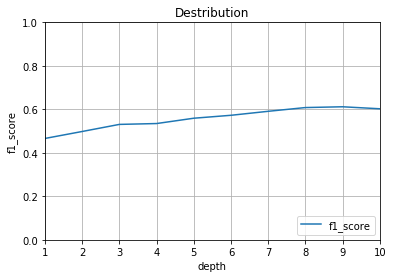

In [242]:
depth_lst = []
f_1_lst = []

for depth in range(1,11):
    model = GradientBoostingClassifier(random_state=12345,max_depth=depth)
    model.fit(X_upsampled, y_upsampled)
    predicted_valid = model.predict(X_valid)
    f_1 = f1_score(y_valid, predicted_valid)
    depth_lst.append(depth)
    f_1_lst.append(f_1)
    
plt.plot(depth_lst, f_1_lst, label='f1_score'% f_1)
plt.xlim([1, 10])
plt.ylim([0, 1])
plt.xlabel('depth')
plt.ylabel('f1_score')
plt.title('Destribution')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [243]:
model_gbUp = GradientBoostingClassifier(random_state=12345,max_depth=9)
model_gbUp.fit(X_upsampled, y_upsampled)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=12345, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [244]:
predicted_valid = model_gbUp.predict(X_valid)
print("F1:",f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.6117908787541713
Auc_ROC: 0.759394852539413


In [245]:
confusion_matrix(y_valid,predicted_valid)

array([[1376,  197],
       [ 152,  275]])

In [246]:
predicted_train = model_gbUp.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.9822723609991942
Auc_ROC: 0.9953984522066514


In [247]:
models = []
models.append(RandomForestClassifier(n_estimators=31, random_state=12345))
models.append(GradientBoostingClassifier(max_depth =9,random_state=12345))
models.append(DecisionTreeClassifier(random_state=12345,max_depth=5))
models.append(LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear'))

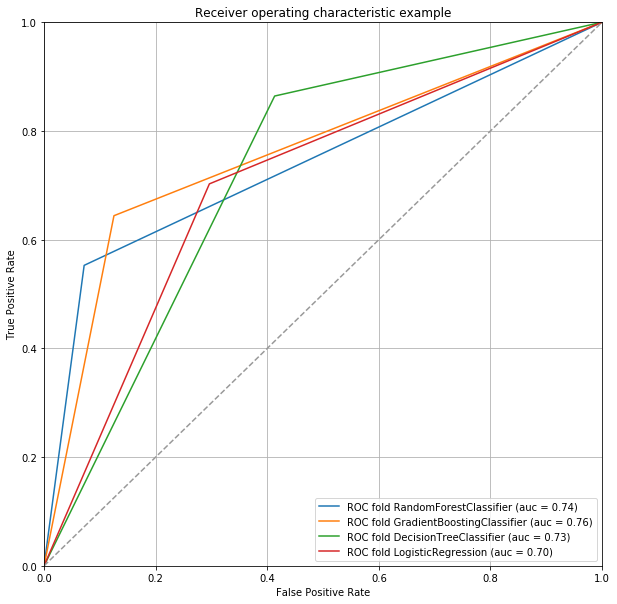

In [248]:
plt.figure(figsize=(10, 10)) 
for model in models:
    model.fit(X_upsampled, y_upsampled)
    pred_scr = model.predict(X_valid)
    fpr, tpr, thresholds = roc_curve(y_valid, pred_scr)
    roc_auc = roc_auc_score(y_valid, pred_scr)
    md = str(model)
    md = md[:md.find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

##### The highest accuracy and F1-score after increasing the sample size were achieved by the GradientBoostingClassifier model.

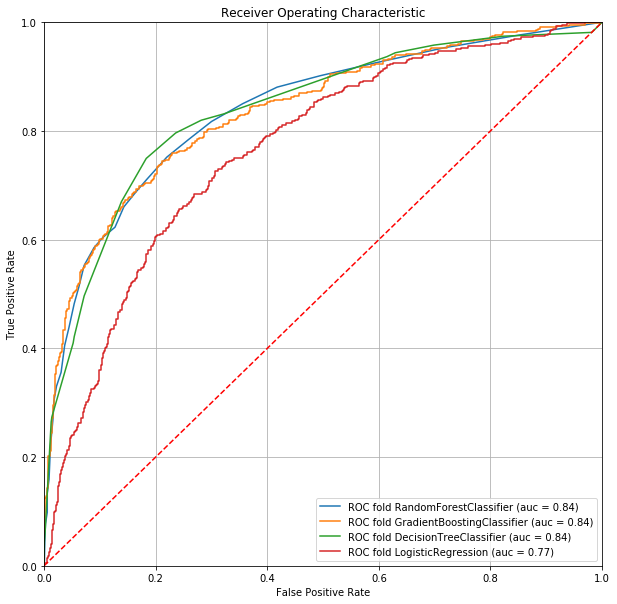

In [249]:
plt.figure(figsize=(10, 10)) 
for model in models:
    model.fit(X_upsampled, y_upsampled)
    probs = model.predict_proba(X_valid)
    preds = probs[:,1]
    fpr, tpr, thresholds = roc_curve(y_valid, preds)
    roc_auc = roc_auc_score(y_valid, preds)
    md = str(model)
    md = md[:md.find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

##### Plotted the ROC curve, which takes the target values and the predicted probabilities of the positive class; the RandomForestClassifier model showed a high AUC-ROC score.

In [250]:
from sklearn.utils import shuffle

In [253]:
print(X_train.shape)

X_sample = X_train.sample(frac=0.2, random_state=12345)
print(X_sample.shape)

(6000, 11)
(1200, 11)


In [254]:
y_train.value_counts()

0    4781
1    1219
Name: Exited, dtype: int64

In [255]:
# Downsampling:
def downsample(X, y, fraction):
    X_zeros = X_train[y_train == 0]
    X_ones = X_train[y_train == 1]
    y_zeros = y_train[y_train == 0]
    y_ones = y_train[y_train == 1]
    
    X_downsampled = pd.concat([X_zeros.sample(frac=fraction, random_state=12345)] + [X_ones])
    y_downsampled = pd.concat([y_zeros.sample(frac=fraction, random_state=12345)] + [y_ones])
    X_downsampled, y_downsampled = shuffle(X_downsampled, y_downsampled, random_state=12345)
    return X_downsampled, y_downsampled

X_downsampled, y_downsampled = downsample(X_train, y_train, 0.2)
print(X_downsampled.shape)
print(y_downsampled.shape)

(2175, 11)
(2175,)


In [257]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [258]:
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(X_downsampled, y_downsampled)
    predicted_valid = model.predict(X_valid)
    print("max_depth =", depth, ": ", end='')
    print("F1 =",f1_score(y_valid, predicted_valid))
    print()

max_depth = 1 : F1 = 0.5110294117647058

max_depth = 2 : F1 = 0.5405887600356825

max_depth = 3 : F1 = 0.5549845837615622

max_depth = 4 : F1 = 0.560352422907489

max_depth = 5 : F1 = 0.5688524590163935

max_depth = 6 : F1 = 0.5548936170212766

max_depth = 7 : F1 = 0.5410958904109591

max_depth = 8 : F1 = 0.5251572327044025

max_depth = 9 : F1 = 0.5189456342668863

max_depth = 10 : F1 = 0.5090609555189456



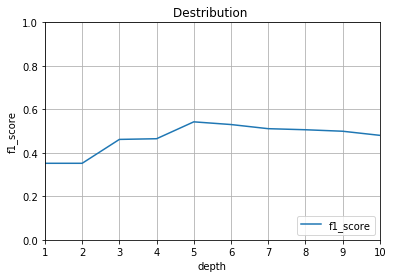

In [112]:
depth_lst = []
f_1_lst = []

for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(X_downsampled, y_downsampled)
    predicted_valid = model.predict(X_valid)
    f_1 = f1_score(y_valid, predicted_valid)
    depth_lst.append(depth)
    f_1_lst.append(f_1)
    
    
plt.plot(depth_lst, f_1_lst, label='f1_score'% f_1)
plt.xlim([1, 10])
plt.ylim([0, 1])
plt.xlabel('depth')
plt.ylabel('f1_score')
plt.title('Destribution ')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [113]:
model_dtcDown = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_dtcDown.fit(X_downsampled, y_downsampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [114]:
predicted_valid = model_dtcDown.predict(X_valid)
print("F1:",f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.5301027900146843
Auc_ROC: 0.7402627179080234


In [115]:
confusion_matrix(y_valid,predicted_valid)

array([[999, 574],
       [ 66, 361]])

In [116]:
predicted_train = model_dtcDown.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.5289546252193532
Auc_ROC: 0.753375964024949


In [117]:
for estimator in range(1,52,5):
    model = RandomForestClassifier(n_estimators=estimator,random_state=12345)
    model.fit(X_downsampled, y_downsampled)
    predicted_valid = model.predict(X_valid)
    print("n_estimators =", estimator, ": ", end='')
    print("F1 =",f1_score(y_valid, predicted_valid))
    print()

n_estimators = 1 : F1 = 0.41707920792079206

n_estimators = 6 : F1 = 0.48057553956834526

n_estimators = 11 : F1 = 0.477742946708464

n_estimators = 16 : F1 = 0.4944115713346482

n_estimators = 21 : F1 = 0.4815970056144728

n_estimators = 26 : F1 = 0.4980443285528031

n_estimators = 31 : F1 = 0.4940289126335638

n_estimators = 36 : F1 = 0.5009633911368016

n_estimators = 41 : F1 = 0.4990595611285266

n_estimators = 46 : F1 = 0.503209242618742

n_estimators = 51 : F1 = 0.4990524320909665



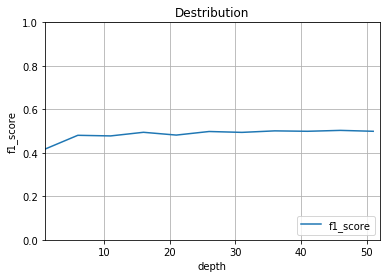

In [118]:
estimator_lst = []
f_1_lst = []

for estimator in range(1,52,5):
    model = RandomForestClassifier(n_estimators=estimator,random_state=12345)
    model.fit(X_downsampled, y_downsampled)
    predicted_valid = model.predict(X_valid)
    f_1 = f1_score(y_valid, predicted_valid)
    estimator_lst.append(estimator)
    f_1_lst.append(f_1)
    
    
plt.plot(estimator_lst, f_1_lst, label='f1_score'% f_1)
plt.xlim([1, 52])
plt.ylim([0, 1])
plt.xlabel('depth')
plt.ylabel('f1_score')
plt.title('Destribution')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [119]:
model_rfcDown = RandomForestClassifier(n_estimators=26,random_state=12345)
model_rfcDown.fit(X_downsampled, y_downsampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=26,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [120]:
predicted_valid = model_rfcDown.predict(X_valid)
print("F1:",f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.4980443285528031
Auc_ROC: 0.7168554247540835


In [121]:
confusion_matrix(y_valid,predicted_valid)

array([[848, 725],
       [ 45, 382]])

In [122]:
predicted_train = model_rfcDown.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.560257589696412
Auc_ROC: 0.7997362406119796


In [124]:
for depth in range(1,11):
    model = GradientBoostingClassifier(random_state=12345,max_depth=depth)
    model.fit(X_downsampled, y_downsampled)
    predicted_valid = model.predict(X_valid)
    print("max_depth =", depth, ": ", end='')
    print("F1 =",f1_score(y_valid, predicted_valid))
    print()

max_depth = 1 : F1 = 0.47453565008987414

max_depth = 2 : F1 = 0.49192546583850927

max_depth = 3 : F1 = 0.5176470588235295

max_depth = 4 : F1 = 0.517584605175846

max_depth = 5 : F1 = 0.5151915455746368

max_depth = 6 : F1 = 0.5076820307281229

max_depth = 7 : F1 = 0.5013157894736843

max_depth = 8 : F1 = 0.5056105610561057

max_depth = 9 : F1 = 0.4957928802588997

max_depth = 10 : F1 = 0.4951140065146579



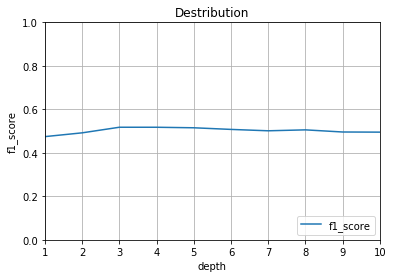

In [125]:
depth_lst = []
f_1_lst = []

for depth in range(1,11):
    model = GradientBoostingClassifier(random_state=12345,max_depth=depth)
    model.fit(X_downsampled, y_downsampled)
    predicted_valid = model.predict(X_valid)
    f_1 = f1_score(y_valid, predicted_valid)
    depth_lst.append(depth)
    f_1_lst.append(f_1)
    
plt.plot(depth_lst, f_1_lst, label='f1_score'% f_1)
plt.xlim([1, 10])
plt.ylim([0, 1])
plt.xlabel('depth')
plt.ylabel('f1_score')
plt.title('Destribution')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [126]:
model_gbDown = GradientBoostingClassifier(random_state=12345,max_depth=5)
model_gbDown.fit(X_downsampled, y_downsampled)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=12345, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [127]:
predicted_valid = model_gbDown.predict(X_valid)
print("F1:",f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.5151915455746368
Auc_ROC: 0.7351232969712851


In [128]:
confusion_matrix(y_valid,predicted_valid)

array([[876, 697],
       [ 37, 390]])

In [129]:
predicted_train = model_gbDown.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.5503787009410144
Auc_ROC: 0.7890147097505695


In [130]:
model_lrDown = LogisticRegression(random_state=12345,solver='liblinear')

In [131]:
model_lrDown.fit(X_downsampled, y_downsampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

In [132]:
predicted_valid = model_lrDown.predict(X_valid)

print("F1:", f1_score(y_valid, predicted_valid))
print("Auc_ROC:", roc_auc_score(y_valid, predicted_valid))

F1: 0.421443736730361
Auc_ROC: 0.6279354028981451


In [133]:
confusion_matrix(y_valid,predicted_valid)

array([[ 513, 1060],
       [  30,  397]])

In [134]:
predicted_train = model_lrDown.predict(X_train)
print("F1:", f1_score(y_train, predicted_train))
print("Auc_ROC:", roc_auc_score(y_train, predicted_train))

F1: 0.40798388573521327
Auc_ROC: 0.6298036955483655


In [135]:
models = []
models.append(RandomForestClassifier(n_estimators=26, random_state=12345))
models.append(GradientBoostingClassifier(max_depth =5,random_state=12345))
models.append(DecisionTreeClassifier(random_state=12345,max_depth=6))
models.append(LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear'))

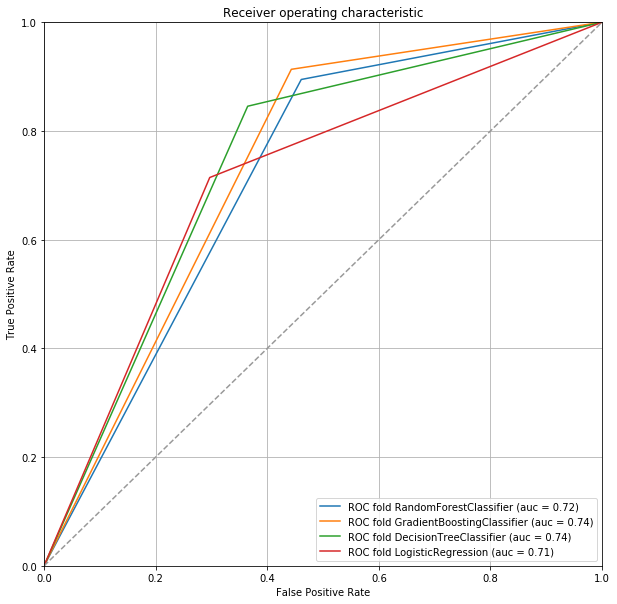

In [136]:
plt.figure(figsize=(10, 10)) 
for model in models:
    model.fit(X_downsampled, y_downsampled)
    pred_scr = model.predict(X_valid)
    fpr, tpr, thresholds = roc_curve(y_valid, pred_scr)
    roc_auc = roc_auc_score(y_valid, pred_scr)
    md = str(model)
    md = md[:md.find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

##### The highest accuracy and F1-score after increasing the sample size were achieved by the DecisionTreeClassifier model.

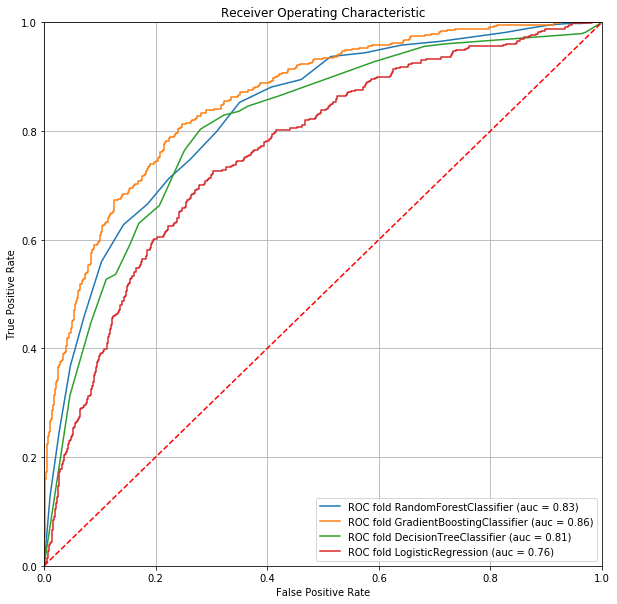

In [137]:
plt.figure(figsize=(10, 10)) 
for model in models:
    model.fit(X_downsampled, y_downsampled)
    probs = model.predict_proba(X_valid)
    preds = probs[:,1]
    fpr, tpr, thresholds = roc_curve(y_valid, preds)
    roc_auc = roc_auc_score(y_valid, preds)
    md = str(model)
    md = md[:md.find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

##### Plotted the ROC curve, which takes the target values and the probabilities of the positive class; the GradientBoostingClassifier model achieved a high AUC-ROC score.

# 4. Model Testing

In [138]:
# Split the features into training and test datasets only.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [139]:
model_gb = GradientBoostingClassifier(max_depth=3, random_state=12345, min_samples_leaf = 50,min_samples_split = 500)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=500,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=12345, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [140]:
predicted_test = model_gb.predict(X_test)

In [143]:
# Calculated F1-score and AUC-ROC for the target variable on the test dataset using the GradientBoostingClassifier model, without accounting for class imbalance.
print("F1:", f1_score(y_test, predicted_test))
print("Auc_ROC:", roc_auc_score(y_test, predicted_test))

F1: 0.5794117647058823
Auc_ROC: 0.71287877547192


In [144]:
confusion_matrix(y_test,predicted_test)

array([[1517,   56],
       [ 230,  197]])

In [145]:
# Upsampling:
def upsample(X, y, repeat):
    X_zeros = X_train[y_train == 0]
    X_ones = X_train[y_train == 1]
    y_zeros = y_train[y_train == 0]
    y_ones = y_train[y_train == 1]
    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    return X_upsampled, y_upsampled

X_upsampled, y_upsampled = upsample(X_train, y_train, 10)
print(X_upsampled.shape)
print(y_upsampled.shape)

(22490, 11)
(22490,)


In [146]:
model = GradientBoostingClassifier(random_state=12345,max_depth=9)
model.fit(X_upsampled, y_upsampled)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=12345, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [147]:
# Calculated F1-score and AUC-ROC for the target variable on the test dataset using the GradientBoostingClassifier model, accounting for class imbalance by increasing the sample size.
predicted_test = model.predict(X_test)
print("F1:",f1_score(y_test, predicted_test))
print("Auc_ROC:", roc_auc_score(y_test, predicted_test))

F1: 0.6275787187839305
Auc_ROC: 0.7732453835285431


In [148]:
confusion_matrix(y_test,predicted_test)

array([[1368,  205],
       [ 138,  289]])

###### Considering that increasing the sample size for the RandomForestClassifier model resulted in the highest AUC-ROC value, I evaluated the model on the test dataset.

In [149]:
model_rfcUp = RandomForestClassifier(n_estimators=31,random_state=12345)

In [150]:
model_rfcUp.fit(X_upsampled, y_upsampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [151]:
predicted_test = model_rfcUp.predict(X_test)
print("F1:",f1_score(y_test, predicted_test))
print("Auc_ROC:", roc_auc_score(y_test, predicted_test))

F1: 0.5799739921976593
Auc_ROC: 0.7232983112267762


In [152]:
confusion_matrix(y_test,predicted_test)

array([[1454,  119],
       [ 204,  223]])

#### Conclusion: The Gradient Boosting model with an increased sample size demonstrated the highest F1 score and accuracy (AUC-ROC), making it the most precise model for predicting customer churn. However, Gradient Boosting without accounting for class imbalance showed a better R² metric (although the project requirement was to achieve an F1 score of at least 0.59 and to compare AUC-ROC). Moreover, the RandomForestClassifier model also exhibited strong metric values.